In [1]:
# -*- coding: utf-8 -*-
#!pip install os
#!pip install glob
#!pip install csv



import os
import glob
import csv
import pandas as pd

In [2]:
DATA_PATH = "./kyoto_shi_hotel/"
All_Files = glob.glob('{}*.csv'.format(DATA_PATH))

In [3]:
list = []
for file in All_Files:
    list.append(pd.read_csv(file))
df = pd.concat(list, sort=False)

In [4]:
df.to_csv('kyoto_shi_hotel.csv',encoding='CP932')

In [5]:
input_book=pd.read_csv('/home/matsuo/semi_3_1/kyoto_hotel/kyoto_shi_hotel.csv',encoding='CP932')

In [6]:
hotelMinCharge=input_book.hotelMinCharge
latitude=input_book.latitude
longitude=input_book.longitude
reviewCount=input_book.reviewCount
reviewAverage=input_book.reviewAverage

In [7]:
import geocoder

location='京都駅'

address=geocoder.osm(location,timeout=5.0)
address.latlng

[35.021041, 135.7556075]

In [8]:
import numpy as np

from geopy.distance import geodesic

distance=[]

for x,y in zip(latitude,longitude):
    location=np.array([x,y])
    distance.append(geodesic(address.latlng,location).km)
    
input_book['distance']=distance

input_book.distance.head()

0    3.471466
1    2.973049
2    3.142989
3    5.174803
4    2.701598
Name: distance, dtype: float64

/home/matsuo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


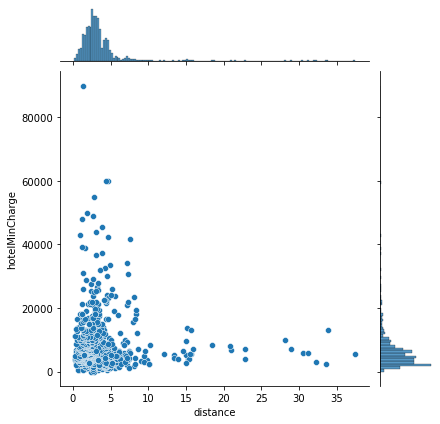

In [9]:
import seaborn as sns
distance=input_book.distance
equation=pd.concat([hotelMinCharge,distance],axis=1)
sns.jointplot('distance','hotelMinCharge',data=equation)

<AxesSubplot:>

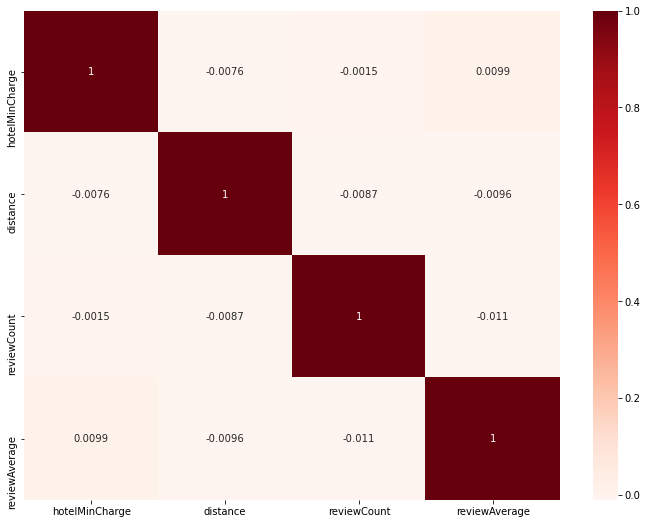

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
equation_2=pd.concat([hotelMinCharge,distance,reviewCount,reviewAverage],axis=1)

sns.heatmap(equation_2.pct_change().corr(),annot=True,cmap='Reds')

In [11]:
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression

reviewAverage= pd.DataFrame(equation_2.reviewAverage)
                            
x_list = equation_2.drop("reviewAverage",1)

x_list = x_list.drop(x_list.columns[np.isnan(x_list).any()], axis=1)


model = sm.OLS(reviewAverage, sm.add_constant(x_list))
result =model.fit()
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:          reviewAverage   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 12 May 2021   Prob (F-statistic):                nan
Time:                        19:20:14   Log-Likelihood:                    nan
No. Observations:                2331   AIC:                               nan
Df Residuals:                    2329   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n